In [ ]:
# Importing Dependencies
import gym_anytrading
import gym
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!pip install gym-anytrading gym stable-baselines3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#loading dataset
data = pd.read_csv('/content/Stockdata.csv')
#viewing the data
print(data)


         Date        Open        High         Low       Close    Volume
0    1/4/2021   19.000000   19.100000   17.150000   17.250000  10022500
1    1/5/2021   17.350000   18.080000   17.230000   17.370001   4961500
2    1/6/2021   17.340000   18.980000   17.330000   18.360001   6056200
3    1/7/2021   18.469999   19.450001   18.020000   18.080000   6129300
4    1/8/2021   18.180000   18.299999   17.080000   17.690001   6482000
..        ...         ...         ...         ...         ...       ...
67  4/12/2021  158.110001  163.899994  135.009995  141.089996  16683600
68  4/13/2021  141.880005  145.380005  132.000000  140.990005   6806900
69  4/14/2021  143.570007  174.089996  143.000000  166.529999  21138100
70  4/15/2021  163.000000  166.250000  152.800003  156.440002   7856800
71  4/16/2021  156.000000  160.199997  151.250000  154.690002   5139700

[72 rows x 6 columns]


In [ ]:
#converting Date Column to DateTime Type
data ['Date'] = pd.to_datetime(data ['Date'])
#setting the column as index
data.set_index('Date', inplace=True)

In [ ]:
#viewing the data
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,19.000000,19.100000,17.15,17.250000,10022500
2021-01-05,17.350000,18.080000,17.23,17.370001,4961500
2021-01-06,17.340000,18.980000,17.33,18.360001,6056200
2021-01-07,18.469999,19.450001,18.02,18.080000,6129300
2021-01-08,18.180000,18.299999,17.08,17.690001,6482000


In [ ]:
#passing the data and creating environment
environment = gym.make('stocks-v0', df=data,frame_bound=(5,20), window_size=5)


In [ ]:
#running the test environment
done = False
state = environment.reset()
result = []
while not done:
    action = environment.action_space.sample()
    state, reward, done, info = environment.step(action)
    # Put each rendered values to result for analysis
    result.append({
        'state': state,
        'action': action,
        'reward': reward,
        'info': info
        }
    )
    if done:
      print(info)
      break

{'total_reward': -130.09000396728518, 'total_profit': 0.8054449436191385, 'position': 1}


In [ ]:
#evaluation of the agent's performance at each step
def print_result(result):
    for i, res in enumerate(result):
        print("-------------------------------------------------"+ str(f"Step:{i + 1}") + "------------------------------------------------------------")
        print(f"State: {res['state']}")
        print(f"Action: {res['action']}")
        print(f"info: {res['info']}")
print_result(result)

-------------------------------------------------Step:1------------------------------------------------------------
State: [[ 1.83600006e+01  9.89999771e-01]
 [ 1.80799999e+01 -2.80000687e-01]
 [ 1.76900005e+01 -3.89999390e-01]
 [ 1.99400005e+01  2.25000000e+00]
 [ 1.99500008e+01  1.00002289e-02]]
Action: 1
info: {'total_reward': 0.0, 'total_profit': 1.0, 'position': 1}
-------------------------------------------------Step:2------------------------------------------------------------
State: [[ 1.80799999e+01 -2.80000687e-01]
 [ 1.76900005e+01 -3.89999390e-01]
 [ 1.99400005e+01  2.25000000e+00]
 [ 1.99500008e+01  1.00002289e-02]
 [ 3.13999996e+01  1.14499989e+01]]
Action: 1
info: {'total_reward': 0.0, 'total_profit': 1.0, 'position': 1}
-------------------------------------------------Step:3------------------------------------------------------------
State: [[ 1.76900005e+01 -3.89999390e-01]
 [ 1.99400005e+01  2.25000000e+00]
 [ 1.99500008e+01  1.00002289e-02]
 [ 3.13999996e+01  1.14499

Text(0, 0.5, 'reward')

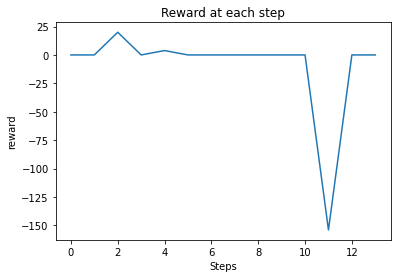

In [ ]:
#analysing rewards of the agent at each step
step_list=[]
reward_list = []
for i, res in enumerate(result):
  step_list.append(i)
  reward_list.append(res['reward'])
plt.plot(step_list,reward_list)
plt.title('Reward at each step')
plt.xlabel('Steps')
plt.ylabel('reward')



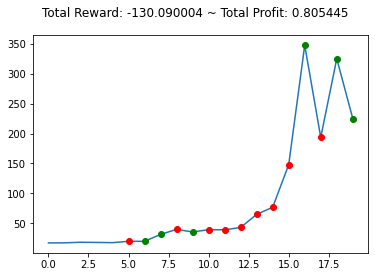

In [ ]:
#Rendering the whole environment.
environment.render_all()

Training an RL agent to trade using the Gym environment

In [ ]:
#setting up our environment for training
environment = gym.make('stocks-v0', df=data, frame_bound=(5,20), window_size=5)

In [ ]:
#Applying the Trading RL Algorithm
model_train = A2C('MlpPolicy', environment, verbose=1)
#setting the learning timesteps
model_train.learn(total_timesteps=1000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 14       |
|    ep_rew_mean        | 175      |
| time/                 |          |
|    fps                | 658      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.596   |
|    explained_variance | 0.000837 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 7.43     |
|    value_loss         | 331      |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 14       |
|    ep_rew_mean        | 197      |
| time/                 |          |
|    fps                | 679      |
|    iterations         | 200      |
|    time_elapsed 

In [ ]:
#Setting up the Agent Environment
environment = gym.make('stocks-v0', df=data,frame_bound=(5,20), window_size=5)
obs = environment.reset()
done = False
result= []
while not done:
    obs = obs[np.newaxis, ...]
    action, _states = model_train.predict(obs)
    obs, reward, done, info = environment.step(action)
    result.append({
        'state': state,
        'action': action,
        'reward': reward,
        'info': info
        }
    )
    if done:
      print(info)
      break


{'total_reward': -216.38000106811526, 'total_profit': 0.9762579634893995, 'position': 0}


In [ ]:
#evaluation of the agent's performance at each step
def print_result(result):
 for i, res in enumerate(result):
        print("-------------------------------------------------"+ str(f"Step:{i + 1}") + "------------------------------------------------------------")
        print(f"State: {res['state']}")
        print(f"Action: {res['action']}")
        print(f"info: {res['info']}")
print_result(result)

-------------------------------------------------Step:1------------------------------------------------------------
State: [[ 147.97999573   71.18999481]
 [ 347.51000977  199.53001404]
 [ 193.6000061  -153.91000366]
 [ 325.          131.3999939 ]
 [ 225.         -100.        ]]
Action: [1]
info: {'total_reward': 0.0, 'total_profit': 1.0, 'position': 1}
-------------------------------------------------Step:2------------------------------------------------------------
State: [[ 147.97999573   71.18999481]
 [ 347.51000977  199.53001404]
 [ 193.6000061  -153.91000366]
 [ 325.          131.3999939 ]
 [ 225.         -100.        ]]
Action: [1]
info: {'total_reward': 0.0, 'total_profit': 1.0, 'position': 1}
-------------------------------------------------Step:3------------------------------------------------------------
State: [[ 147.97999573   71.18999481]
 [ 347.51000977  199.53001404]
 [ 193.6000061  -153.91000366]
 [ 325.          131.3999939 ]
 [ 225.         -100.        ]]
Action: [1]

Text(0, 0.5, 'reward')

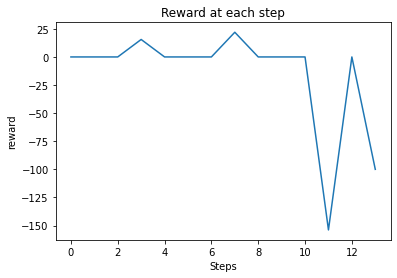

In [ ]:
#analysing rewards of the agent at each step
step_list=[]
reward_list = []
for i, res in enumerate(result):
  step_list.append(i)
  reward_list.append(res['reward'])
plt.plot(step_list,reward_list)
plt.title('Reward at each step')
plt.xlabel('Steps')
plt.ylabel('reward')

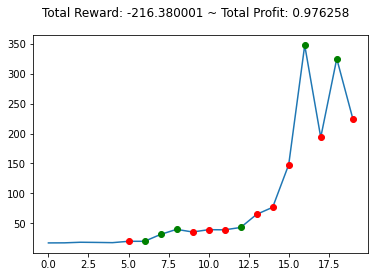

In [ ]:
#Rendering the whole environment
environment.render_all()